## Here we deal with the process of importing our own custom data

In [2]:
import torch
from torch import nn

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [4]:
!nvdia-smi

/bin/bash: line 1: nvdia-smi: command not found


## 1.Getting data

* below data are smaller version of food101

In [5]:
import requests
import zipfile
from pathlib import Path

#setup path to data folder
data_path = Path('data/')
image_path = data_path / 'pizza_steak_sushi'

#if image folder doesnt exist
if image_path.is_dir():
  print(f'{image_path} already exist ...... skipping creating')
else:
  print(f'{image_path} doesnt exist create one')
  image_path.mkdir(parents=True, exist_ok=True)

#downloading data
with open(data_path / 'pizza_steak_sushi.zip', 'wb') as f:
  request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
  print(f'Downloading pizza, steak and sushi')
  f.write(request.content)

#unzipping
with zipfile.ZipFile(data_path / 'pizza_steak_sushi.zip', 'r') as zip_ref:
  print('unzipping')
  zip_ref.extractall(image_path)

data/pizza_steak_sushi doesnt exist create one
unzipping


In [6]:
data_path / 'pizza_steak_sushi.zip'

PosixPath('data/pizza_steak_sushi.zip')

## 2.Data preparation and Data Exploration

In [7]:
import os
def walk_through(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [8]:
walk_through(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.


In [9]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 visualizing the image

1. get all the image path
2. pick a random image path
3. get image class using `pathlib.Path.parent.steam
4. open image with python PIL
5. print image and show metadata

Image path: data/pizza_steak_sushi/train/sushi/2323548.jpg
Image classs: sushi
Height: 512. Width: 512


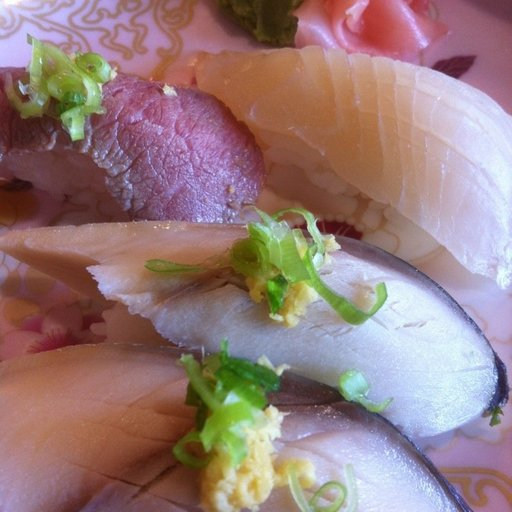

In [10]:
import random
from PIL import Image

# 1.getting all image path
image_path_list = list(image_path.glob('*/*/*.jpg'))

# 2.pick random image path
random_image_path = random.choice(image_path_list)

# 3.get image class(image class is the directory where image is store)
image_class = random_image_path.parent.stem

# 4.open image
img = Image.open(random_image_path)

print(f'Image path: {random_image_path}')
print(f'Image classs: {image_class}')
print(f'Height: {img.height}. Width: {img.width}')
img

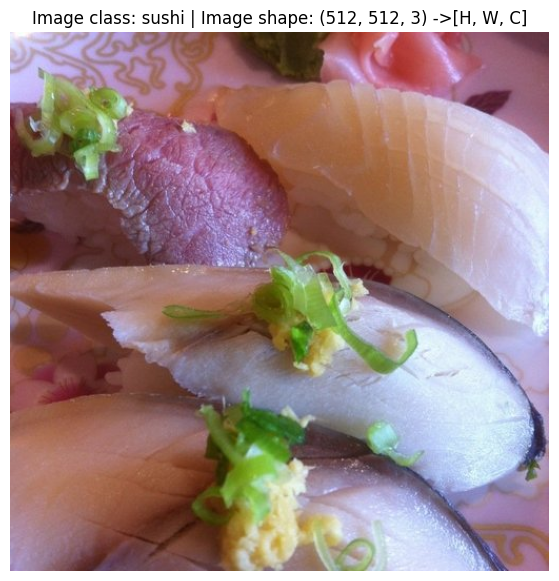

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# turn image in to array
img_as_array = np.asarray(img)

#plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f'Image class: {image_class} | Image shape: {img_as_array.shape} ->[H, W, C]')
plt.axis(False);

## 3.Transferring our data to tensors

In [12]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [13]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
data_transform

Compose(
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
)

In [14]:
a = data_transform(img)
a.shape, a[1], a[1].shape, a[1,1], a[1,1].shape

(torch.Size([3, 64, 64]),
 tensor([[0.2118, 0.2157, 0.2196,  ..., 0.8314, 0.9059, 0.9137],
         [0.2118, 0.2235, 0.2471,  ..., 0.7686, 0.7804, 0.8275],
         [0.2431, 0.2784, 0.3176,  ..., 0.6980, 0.7216, 0.7294],
         ...,
         [0.3843, 0.4118, 0.4471,  ..., 0.5373, 0.5569, 0.5569],
         [0.3961, 0.4471, 0.4549,  ..., 0.5333, 0.5647, 0.5647],
         [0.4275, 0.4549, 0.4588,  ..., 0.5294, 0.5608, 0.5608]]),
 torch.Size([64, 64]),
 tensor([0.2118, 0.2235, 0.2471, 0.2863, 0.3333, 0.3569, 0.3686, 0.3725, 0.3765,
         0.3725, 0.3373, 0.3020, 0.4549, 0.5882, 0.4627, 0.3529, 0.2706, 0.2392,
         0.3725, 0.6157, 0.5176, 0.3412, 0.2667, 0.2902, 0.3608, 0.3843, 0.3333,
         0.2314, 0.1686, 0.1451, 0.1373, 0.1608, 0.1686, 0.1922, 0.1725, 0.1451,
         0.1765, 0.2627, 0.3608, 0.3569, 0.3294, 0.3373, 0.3608, 0.3843, 0.4078,
         0.4431, 0.4392, 0.4627, 0.4941, 0.5020, 0.5294, 0.5255, 0.5608, 0.5961,
         0.6118, 0.6706, 0.6902, 0.6706, 0.6902, 0.6980, 0.

In [15]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

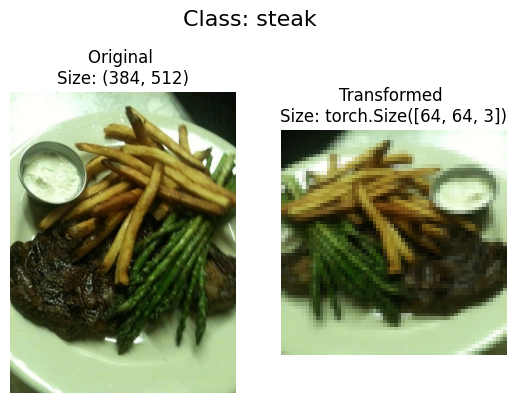

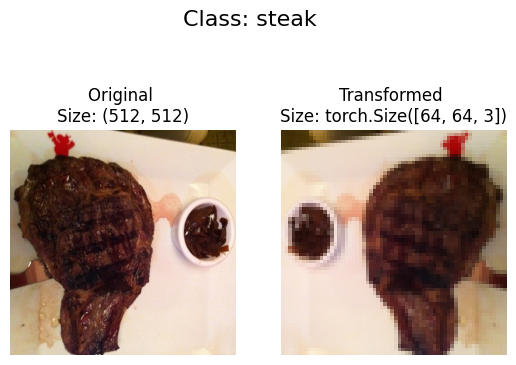

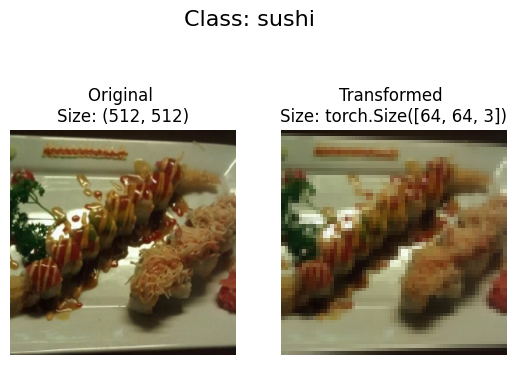

In [16]:
plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

## 4. option:1 Loading image data using `ImageFolder`

In [17]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform,
                                 target_transform=None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [18]:
#get class name as list
class_name = train_data.classes
class_name

['pizza', 'steak', 'sushi']

In [19]:
#get class name as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [20]:
len(train_data), len(test_data)

(225, 75)

In [21]:
img, label = train_data[0][0], train_data[0][1]
print(f'Image shape: {img.shape}')
print(f'Image datatype: {img.dtype}')
print(f'Label datatype: {type(label)}')
img, label

Image shape: torch.Size([3, 64, 64])
Image datatype: torch.float32
Label datatype: <class 'int'>


(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

orginal shape: torch.Size([3, 64, 64])
Modified shape: torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

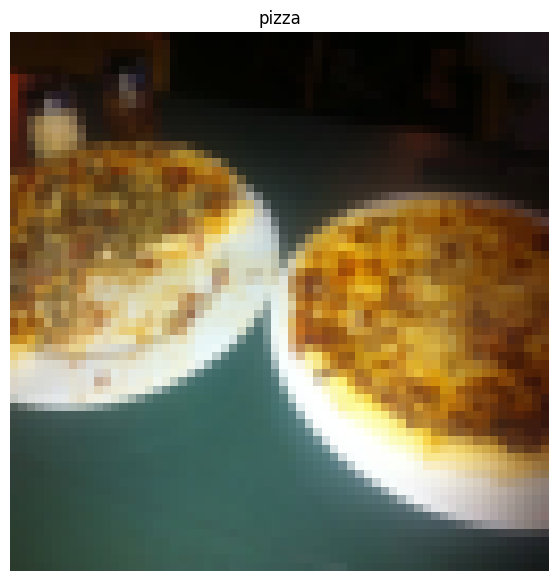

In [22]:
img_permut = img.permute(1, 2, 0)
print(f'orginal shape: {img.shape}')
print(f'Modified shape: {img_permut.shape}')

#plot image
plt.figure(figsize=(10, 7))
plt.imshow(img_permut)
plt.axis('off')
plt.title(class_name[label])

### 4.1 Turn load image into `dataloaders`

`DataLoader` convert data into iterables and we can coustomize batchsize so our model can see batchsize image at a time

In [23]:
import os
os.cpu_count()

2

In [24]:
from torch.utils.data import DataLoader
BATCH_SIZE = 1

train_dataloader = DataLoader(dataset=train_data,
           batch_size=BATCH_SIZE,
           shuffle=True,
           num_workers=os.cpu_count())

test_dataloader = DataLoader(dataset=test_data,
           batch_size=BATCH_SIZE,
           num_workers=os.cpu_count())

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7958b00f3b20>,
 <torch.utils.data.dataloader.DataLoader at 0x795845b38d00>)

In [25]:
len(train_dataloader), len(test_dataloader) #batch size 2 mean we divide 225 by 2

(225, 75)

In [26]:
len(train_data), len(test_data)

(225, 75)

In [27]:
img, label = next(iter(train_dataloader))

In [28]:
img.shape, label.shape #[batch_size, C, H, W]

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

## 5.Loading Image data with custom datasets
1. Want to be able to load images from file
2. Want to be able to get class names from the Dataset
3. Want to be able to get classes as dictionary from the Dataset

Pros:

- Can create a Dataset out of almost anything
- Not limited to PyTorch pre-built Dataset functions

Cons:

- Even though you could create Dataset out of almost anything, it doesn't mean it will work...
- Using a custom Dataset often results in us writing more code, which could be prone to errors or performance issues

In [29]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [30]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [31]:
#setting path for target dir
target_dir = train_dir

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_dir))])
print(f"Class names found: {class_names_found}")

Class names found: ['pizza', 'steak', 'sushi']


In [32]:
list(os.scandir(target_dir))

[<DirEntry 'steak'>, <DirEntry 'sushi'>, <DirEntry 'pizza'>]

In [33]:
# Make function to find classes in target directory
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  #get class name by scanning dir
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
  #raise error if class name not found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}.")

  # 3. Create a dictionary of index labels (computers prefer numerical rather than string labels)
  class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}

  return classes, class_to_idx

In [34]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1creating custom class

In [35]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [36]:
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
  def __init__(self, target_dir:str, transform=None) -> None:
    self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))
    self.transform = transform
    self.classes, self.class_to_idx = find_classes(target_dir)

  def load_image(self, index: int) -> Image.Image:
    image_path = self.paths[index]
    return Image.open(image_path)

  def __len__(self) -> int:
    return len(self.paths)

  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    img = self.load_image(index)
    class_name  = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    # Transform if necessary
    if self.transform:
      return self.transform(img), class_idx # return data, label (X, y)
    else:
      return img, class_idx # return data, label (X, y)

In [37]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Dont Augment test data only resize
test_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [38]:
train_data_custom = ImageFolderCustom(target_dir=train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(target_dir=test_dir,
                                     transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7957fea88850>,
 <__main__.ImageFolderCustom at 0x7957fea8bbe0>)

In [39]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [40]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [41]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [42]:
# Check for equality amongst our custom Dataset and ImageFolder Dataset
print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

True
True
True


### 5.2 creating a fn to display random image

In [43]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

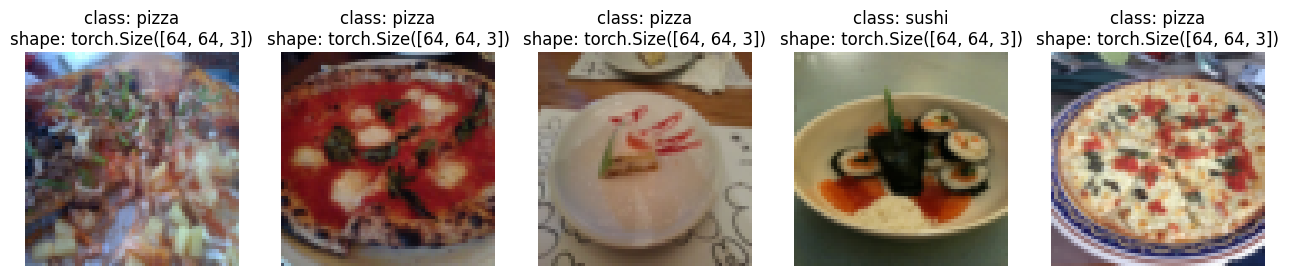

In [44]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data,
                      n=5,
                      classes=class_name,
                      seed=None)

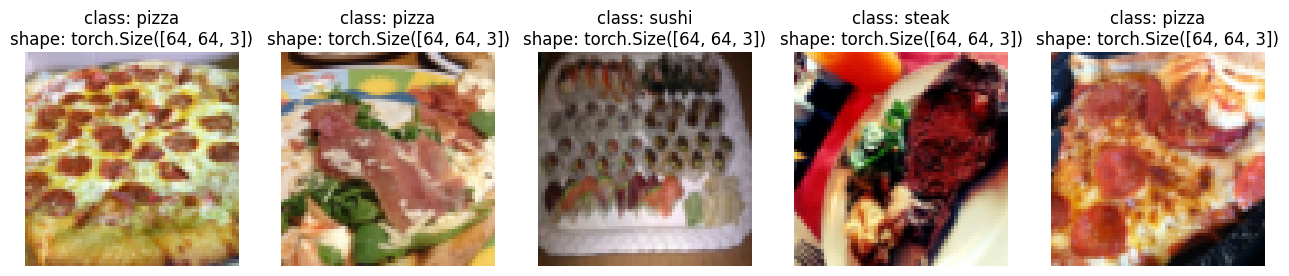

In [45]:
# Display random images from ImageFolderCustom Dataset
display_random_images(train_data_custom,
                      n=5,
                      classes=class_name,
                      seed=None)

### 5.3 turning custom data to dataloader

In [46]:
from torch.utils.data import DataLoader

train_dataloader_custom = DataLoader(
    dataset=train_data_custom,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=os.cpu_count())

test_dataloader_custom = DataLoader(
    dataset=test_data_custom,
    batch_size=BATCH_SIZE,
    num_workers=os.cpu_count(),
    shuffle=False
)

In [47]:
img_custom, label_custom = next(iter(train_dataloader_custom))
print(f" Image.shape: {img_custom.shape} [B, C, H, W]")
print(f" Label.shape: {label_custom.shape}")

 Image.shape: torch.Size([1, 3, 64, 64]) [B, C, H, W]
 Label.shape: torch.Size([1])


## 6.Other form of augumentation
* aka transformation image
* augumentation help to increase training data by applying transformation

In [48]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

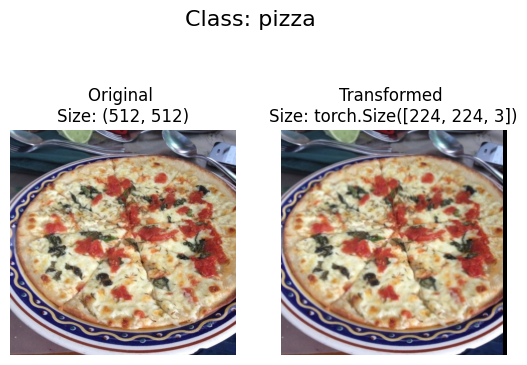

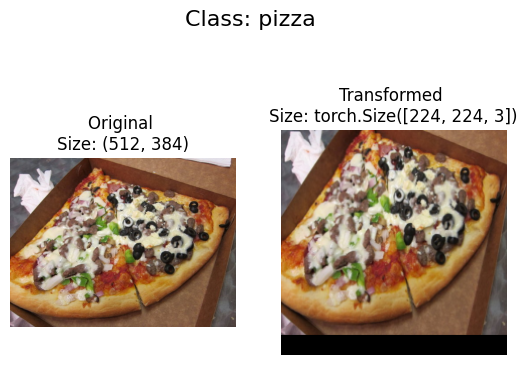

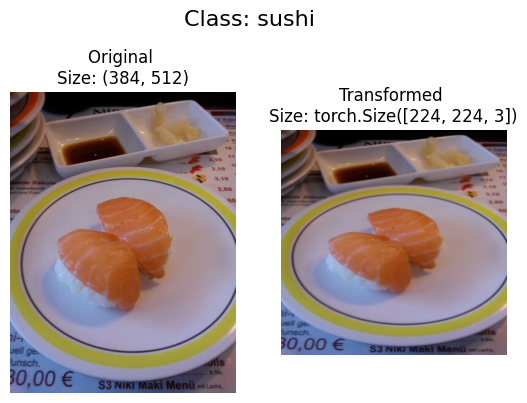

In [49]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Plot random images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n=3,
    seed=None
)

## 7.TinyVGG without data augumentation

In [50]:
simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [51]:
from torchvision import datasets

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
# 1. Load and transform image
train_data_simple = datasets.ImageFolder(root=train_dir, transform= simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform= simple_transform)

# 2. Convert them into dataloaders
train_dataloader_simple = DataLoader(dataset=train_data_simple,
           batch_size=BATCH_SIZE,
           shuffle=True,
           num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
           batch_size=BATCH_SIZE,
           shuffle=False,
           num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7957fdc57460>,
 <torch.utils.data.dataloader.DataLoader at 0x7957fdc268f0>)

In [52]:
# creating tinyVGG model
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape:int,
               output_shape:int,
               hidden_unit:int):
    super().__init__()

    self.conv_layer1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_unit,
                  kernel_size=3, stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_unit,
                  out_channels=hidden_unit,
                  kernel_size=3, stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.conv_layer2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_unit,
                  out_channels=hidden_unit,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_unit,
                  out_channels=hidden_unit,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.conv_layer3 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_unit,
                  out_channels=hidden_unit,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_unit,
                  out_channels=hidden_unit,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_unit * 8 * 8, out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_layer3(self.conv_layer2(self.conv_layer1(x)))
    #print(x.shape)
    return self.classifier(x)

In [53]:
torch.manual_seed(42)

model_0 = TinyVGG(input_shape=3, #channel
                  output_shape=len(train_data.classes),
                  hidden_unit=10).to(device)

model_0

TinyVGG(
  (conv_layer1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_featur

### 7.1 Model Information

In [54]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_simple))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))

# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[ 0.0212,  0.0188, -0.0160]])

Output prediction probabilities:
tensor([[0.3377, 0.3369, 0.3254]])

Output prediction label:
tensor([0])

Actual label:
0


### 7.2 Model Info using torchinfo

In [55]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

In [56]:
from torchinfo import summary

summary(model_0,input_size=(BATCH_SIZE, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 10, 64, 64]          280
│    └─ReLU: 2-2                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 10, 64, 64]          910
│    └─ReLU: 2-4                         [32, 10, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 10, 32, 32]          --
├─Sequential: 1-2                        [32, 10, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 10, 32, 32]          910
│    └─ReLU: 2-7                         [32, 10, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 10, 32, 32]          910
│    └─ReLU: 2-9                         [32, 10, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 10, 16, 16]          --
├─Sequentia

In [57]:
def train_step(model : torch.nn.Module,
              dataloader : torch.utils.data.dataloader,
              loss_fn : torch.nn.Module,
              optimizer : torch.optim.Optimizer,
               device=device):
  model.train()
  train_loss = 0
  train_acc = 0

  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    #forward
    y_preds = model(X)
    #loss
    loss = loss_fn(y_preds, y)
    train_loss += loss.item()
    y_pred_class = torch.argmax(torch.softmax(y_preds, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_preds)
    #optimizer.zero_grad, backpropogration, optimizer.step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  #print(f"Train loss: {train_loss} | Train acc: {train_acc}")
  return train_loss, train_acc

In [58]:
def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.dataloader,
              loss_fn:torch.nn.Module,
              optimizer:torch.optim.Optimizer,
              device=device):
  model.eval()
  test_loss = 0
  test_acc = 0

  with torch.inference_mode():
    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)
      #forward
      y_preds = model(X)
      #loss
      loss = loss_fn(y_preds, y)
      test_loss += loss.item()
      #calc acc
      y_pred_class = torch.argmax(torch.softmax(y_preds, dim=1), dim=1)
      test_acc += (y_pred_class==y).sum().item()/len(y_preds)

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

  #print(f"Test loss: {test_loss} | Test acc: {test_acc}")
  return test_loss, test_acc

In [59]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)

        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        optimizer=optimizer)

        # 4. Print out what's happening

        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
          )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [60]:
NUMBER_EPOCHS = 10

#lossfn, optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model_0.parameters(), lr=0.0001)

#start
from timeit import default_timer as timer
start_time = timer()

#train
model_result_0 = train(model=model_0,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=NUMBER_EPOCHS)

end_time = timer()
print(f"Total time: {end_time - start_time:.3f} s")


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1001 | train_acc: 0.3156 | test_loss: 1.1014 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0995 | train_acc: 0.2889 | test_loss: 1.1011 | test_acc: 0.3333
Epoch: 3 | train_loss: 1.0995 | train_acc: 0.3378 | test_loss: 1.1017 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0998 | train_acc: 0.2933 | test_loss: 1.1017 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0994 | train_acc: 0.3467 | test_loss: 1.1015 | test_acc: 0.3333
Epoch: 6 | train_loss: 1.0991 | train_acc: 0.3467 | test_loss: 1.1011 | test_acc: 0.3333
Epoch: 7 | train_loss: 1.0991 | train_acc: 0.3467 | test_loss: 1.1006 | test_acc: 0.3333
Epoch: 8 | train_loss: 1.0985 | train_acc: 0.3422 | test_loss: 1.0996 | test_acc: 0.3333
Epoch: 9 | train_loss: 1.0945 | train_acc: 0.3511 | test_loss: 1.0944 | test_acc: 0.3333
Epoch: 10 | train_loss: 1.0814 | train_acc: 0.3511 | test_loss: 1.0761 | test_acc: 0.4133
Total time: 48.508 s


### 7.3 ploat the loss curve

In [61]:
model_result_0.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [62]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

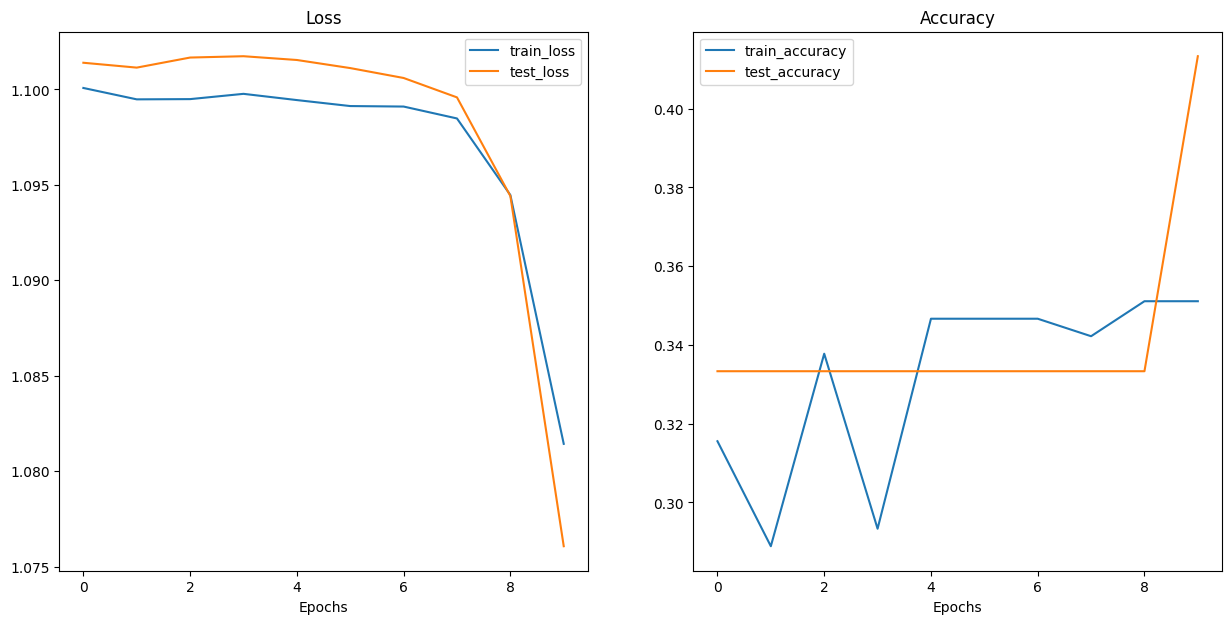

In [63]:
plot_loss_curves(model_result_0)

## 8.Model 1 TinyVGG with data augmentation

* create transforms with augmentation
* create datasets and dataloaders
* construct model
* train model

In [64]:
train_transforme_augment = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(),
    transforms.ToTensor()
    ])

test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [65]:
train_data_augment = datasets.ImageFolder(root=train_dir,
                                          transform=train_transforme_augment)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transform_simple)

In [66]:
import os
NUMBER_OF_CPU = os.cpu_count()
BATCH_SIZE = 32

train_dataloader_augment = DataLoader(dataset=train_data_augment,
                                batch_size=BATCH_SIZE,
                                shuffle=True,
                                num_workers=NUMBER_OF_CPU)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                batch_size=BATCH_SIZE,
                                shuffle=False,
                                num_workers=NUMBER_OF_CPU)

In [67]:
model_1 = TinyVGG(input_shape=3,
                  output_shape=len(train_data_augment.classes),
                  hidden_unit=10).to(device)
model_1

TinyVGG(
  (conv_layer1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_featur

In [68]:
summary(model_1, input_size=(32, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 10, 64, 64]          280
│    └─ReLU: 2-2                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 10, 64, 64]          910
│    └─ReLU: 2-4                         [32, 10, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 10, 32, 32]          --
├─Sequential: 1-2                        [32, 10, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 10, 32, 32]          910
│    └─ReLU: 2-7                         [32, 10, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 10, 32, 32]          910
│    └─ReLU: 2-9                         [32, 10, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 10, 16, 16]          --
├─Sequentia

In [69]:
EPOCHS = 10

# optimizer and loss
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.0001)

#time
from timeit import default_timer as timer
start_time = timer()

model_1_result = train(model=model_1,
                      train_dataloader=train_dataloader_augment,
                      test_dataloader=test_dataloader_simple,
                      optimizer=optimizer,
                      loss_fn=loss_fn,
                      epochs=EPOCHS)

end_time = timer()
print(f"Total time: {end_time - start_time: .3f}s")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0985 | train_acc: 0.2539 | test_loss: 1.0975 | test_acc: 0.4100
Epoch: 2 | train_loss: 1.1003 | train_acc: 0.2734 | test_loss: 1.0961 | test_acc: 0.5417
Epoch: 3 | train_loss: 1.0991 | train_acc: 0.2812 | test_loss: 1.0963 | test_acc: 0.5417
Epoch: 4 | train_loss: 1.0983 | train_acc: 0.4023 | test_loss: 1.0974 | test_acc: 0.5417
Epoch: 5 | train_loss: 1.0996 | train_acc: 0.2812 | test_loss: 1.0969 | test_acc: 0.5417
Epoch: 6 | train_loss: 1.0992 | train_acc: 0.2812 | test_loss: 1.0973 | test_acc: 0.5417
Epoch: 7 | train_loss: 1.0985 | train_acc: 0.4102 | test_loss: 1.0984 | test_acc: 0.3911
Epoch: 8 | train_loss: 1.0978 | train_acc: 0.4219 | test_loss: 1.0995 | test_acc: 0.2604
Epoch: 9 | train_loss: 1.0987 | train_acc: 0.3047 | test_loss: 1.1006 | test_acc: 0.2604
Epoch: 10 | train_loss: 1.0969 | train_acc: 0.4258 | test_loss: 1.1019 | test_acc: 0.2604
Total time:  21.390s


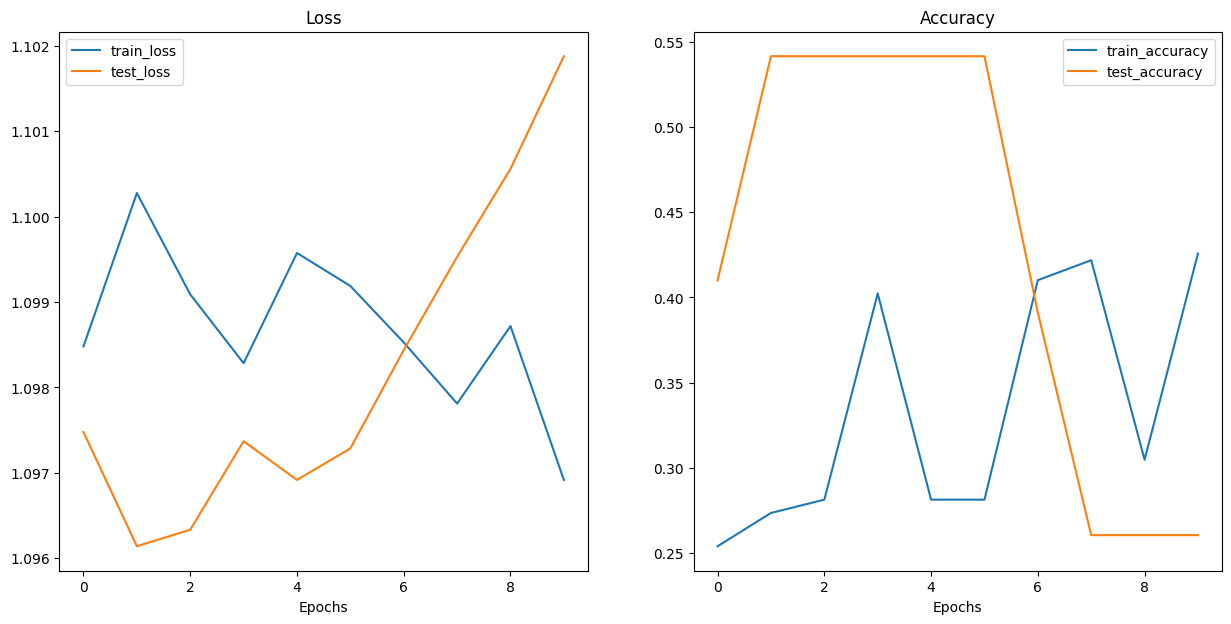

In [70]:
plot_loss_curves(model_1_result)

## 10.Compare model result

In [71]:
import pandas as pd
model_0_df = pd.DataFrame(model_result_0)
model_1_df = pd.DataFrame(model_1_result)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.100076,0.315556,1.101397,0.333333
1,1.099480,0.288889,1.101142,0.333333
2,1.099493,0.337778,1.101670,0.333333
3,1.099769,0.293333,1.101739,0.333333
4,1.099442,0.346667,1.101542,0.333333
5,1.099129,0.346667,1.101118,0.333333
6,1.099103,0.346667,1.100599,0.333333
7,1.098480,0.342222,1.099583,0.333333
8,1.094468,0.351111,1.094417,0.333333
9,1.081437,0.351111,1.076075,0.413333


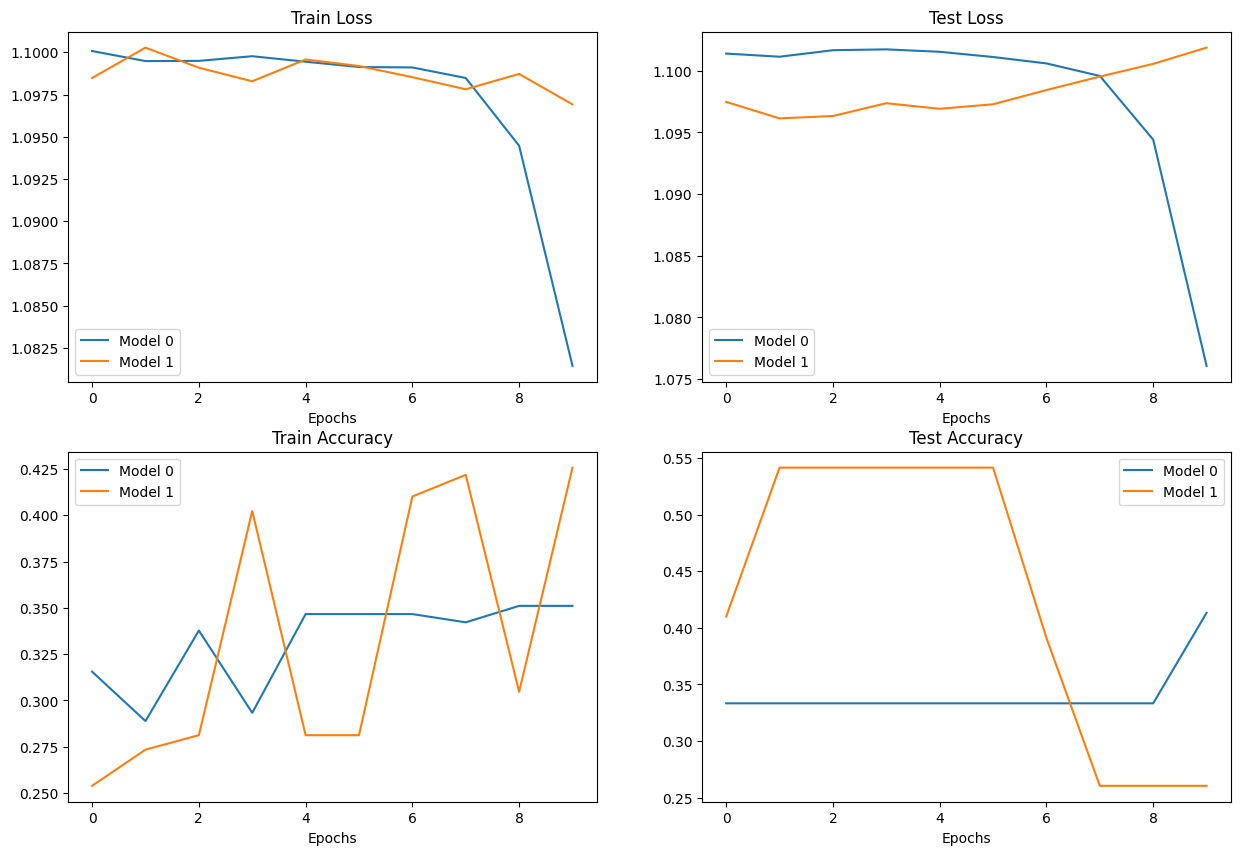

In [72]:
# Setup a plot
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

## 11.Predecting in custom image

In [73]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

In [74]:
import torchvision

custom_image = torchvision.io.read_image(str(custom_image_path))
custom_image.shape, custom_image.dtype

(torch.Size([3, 4032, 3024]), torch.uint8)

In [75]:
custom_image = custom_image.type(torch.float32)
#normilization
custom_image = custom_image/ 255

custom_image.dtype, custom_image

(torch.float32,
 tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
          [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
          [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
          ...,
          [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
          [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
          [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],
 
         [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
          [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
          [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
          ...,
          [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
          [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
          [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],
 
         [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
          [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
          [0.3412, 0.435

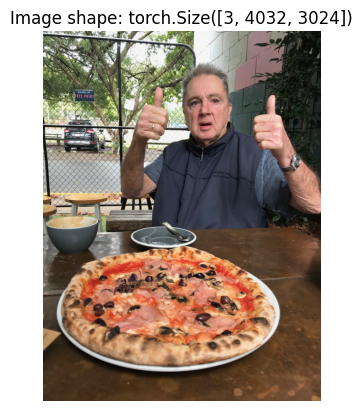

In [76]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [77]:
custom_img_transform = transforms.Compose([
    transforms.Resize(size=(64, 64))
])

transformed_image = custom_img_transform(custom_image)

print(f"Orginal Shape: {custom_image.shape}")
print(f"Transform Shape: {transformed_image.shape}")

Orginal Shape: torch.Size([3, 4032, 3024])
Transform Shape: torch.Size([3, 64, 64])


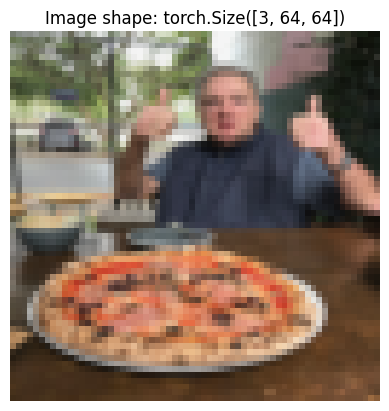

In [78]:
# Plot custom image
plt.imshow(transformed_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {transformed_image.shape}")
plt.axis(False);

In [79]:
transformed_image.shape, transformed_image.unsqueeze(dim=0).shape

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

In [80]:
model_1.eval()
with torch.inference_mode():
  batch_transform_image = transformed_image.unsqueeze(dim=0)
  custom_img_pred = model_1(batch_transform_image.to(device))
custom_img_pred

tensor([[2.6982e-02, 1.2704e-02, 5.5078e-05]])

In [81]:
# pred logit -> pred probablities -> pred label

result = torch.argmax(torch.softmax(custom_img_pred, dim=1), dim=1)
result

tensor([0])

In [82]:
class_name[result]

'pizza'

### 11.1Functionizing above process

In [83]:
def pred_result(model,
                image_path,
                transform=None):
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
  target_image = target_image/255

  if transform:
    target_image = transform(target_image)

  target_image = target_image.unsqueeze(dim=0)

  model.eval()
  with torch.inference_mode():
    img_pred = model(target_image.to(device))

  result = torch.argmax(torch.softmax(custom_img_pred, dim=1), dim=1)
  print(result)

In [85]:
pred_result(model=model_1,
            image_path=custom_image_path,
            transform=custom_img_transform)

tensor([0])


In [86]:
class_name[0]

'pizza'